#### A recommendation app for books 

I will be doing the folling through out the notebook:
- Exploratory data analysis:
    - There are 3 csv files containing book names,rating of the books, and users of the books


In [12]:
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


In [2]:
# load the 3 csvs 
BOOKS_PATH = "/media/danlof/dan files/data_science_codes/Recommender_project/books_data/books.csv"
RATING_PATH = "/media/danlof/dan files/data_science_codes/Recommender_project/books_data/ratings.csv"
USERS_PATH = "/media/danlof/dan files/data_science_codes/Recommender_project/books_data/users.csv"


books_df = pd.read_csv(BOOKS_PATH, sep=';',
                       encoding='latin1',on_bad_lines='skip')
rating_df = pd.read_csv(RATING_PATH,sep=';',
                        encoding='latin1',on_bad_lines='skip')
users_df = pd.read_csv(USERS_PATH,sep=';',
                       encoding='latin1',on_bad_lines='skip')


#### Exploring books dataset

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books_df.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
Book-Title,271360,242135,Selected Poems,27
Book-Author,271358,102022,Agatha Christie,632
Year-Of-Publication,271360,202,2002,13903
Publisher,271358,16807,Harlequin,7535
Image-URL-S,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-M,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2


- Contains book information such as ,book author,book title etc that describe the dataset in general.

Description:
- we can see that the books dataset has 8 columns,
- some of the columns have missing objects,
- from the book title , "selected poems" has the highest frequency
- Also most the books were published in 2002

#### Exploring ratings

In [4]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
rating_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [8]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


- This dataset contained the user ids,ISBN and the ratings for the books 

#### Exploring users

In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
users_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


- Finally, this dataset described where the users were from , their age and ids.

#### A graph to show book ratings

<Axes: xlabel='Book-Rating', ylabel='Count'>

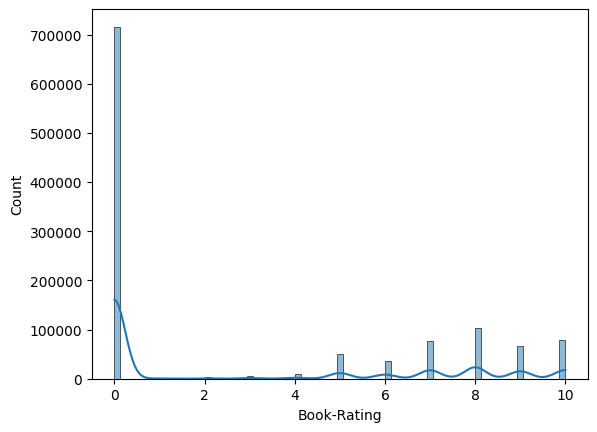

In [13]:
sns.histplot(rating_df['Book-Rating'],kde=True)

#### Data cleaning

1. missing values

In [16]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
## drop row wise the missing objects  && the inplace modifies the dataframe instead of creating a new one 

books_df.dropna(inplace=True)

2. Select Features

In [19]:
## drop a few columns that are not needed
books_df.drop(['Image-URL-S','Image-URL-M'],axis=1,inplace=True)

In [20]:
## rename the columns for easy use

books_df = books_df.rename(columns={
   'ISBN':'ISBN ',
   'Book-Title':'Title',
   'Book-Author':'Author',
   'Year-Of-Publication':'Publication_year',
   'Publisher':'Publisher',
   'Image-URL-L':'Book_image'
})

In [21]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271353 non-null  object
 1   Title             271353 non-null  object
 2   Author            271353 non-null  object
 3   Publication_year  271353 non-null  object
 4   Publisher         271353 non-null  object
 5   Book_image        271353 non-null  object
dtypes: object(6)
memory usage: 14.5+ MB


In [23]:
books_df['Publication_year'] = pd.to_numeric(books_df['Publication_year'])
books_df['Publication_year'].describe()

count    271353.000000
mean       1959.760235
std         257.996082
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Publication_year, dtype: float64

- this dataset has a 2050 publication, that is wrong entry,
- since this dataset is updated annually we will only remove the books beyond the current year(2024)

In [30]:
(books_df['Publication_year']>2024).value_counts()

Publication_year
False    271341
True         12
Name: count, dtype: int64

In [31]:
# this removes all the books after 2024
books_df = books_df[~(books_df['Publication_year']>2024)]

3. Check for duplication

In [32]:
books_df = books_df[~(books_df.duplicated(['Title']))]

4. outliers

<Axes: xlabel='Publication_year', ylabel='Count'>

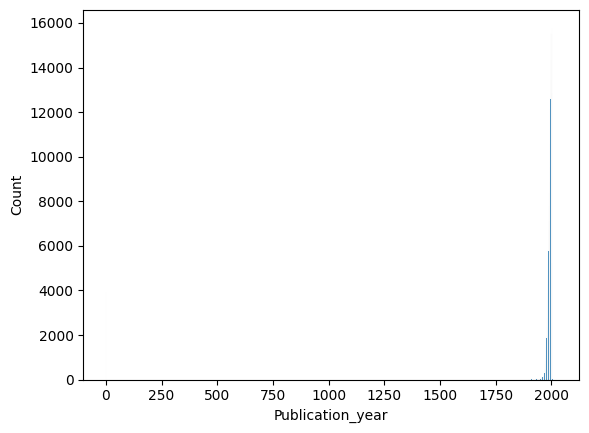

In [33]:
sns.histplot(books_df['Publication_year'])

In [34]:
(books_df['Publication_year']==0).value_counts()

Publication_year
False    238203
True       3915
Name: count, dtype: int64

In [35]:
books_df = books_df[~(books_df['Publication_year']==0)]

In [36]:
(books_df['Publication_year']==0).value_counts()

Publication_year
False    238203
Name: count, dtype: int64

<Axes: xlabel='Publication_year', ylabel='Count'>

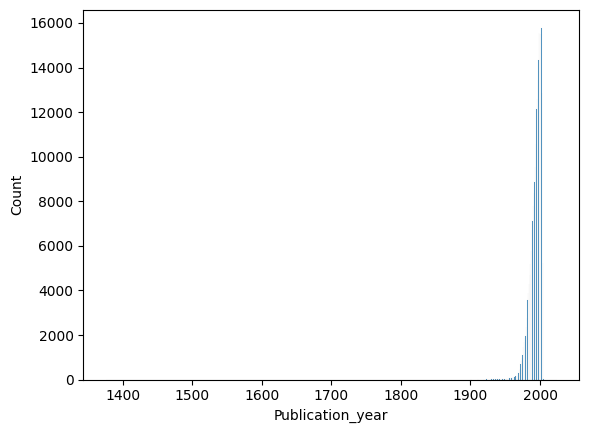

In [37]:
sns.histplot(books_df['Publication_year'])

In [39]:
## most books are after 1900 , then that will be my focus 

books_df = books_df[~(books_df['Publication_year']< 1900)]

<Axes: xlabel='Publication_year', ylabel='Count'>

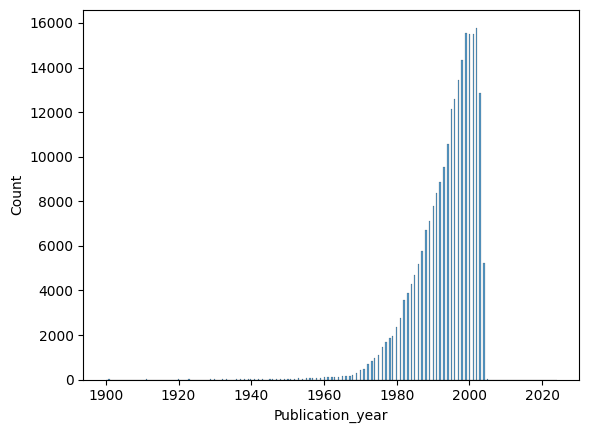

In [40]:
sns.histplot(books_df['Publication_year'])

In [41]:
## lets us push it even further to 1940
books_df = books_df[~(books_df['Publication_year']<1950)]

<Axes: xlabel='Publication_year', ylabel='Count'>

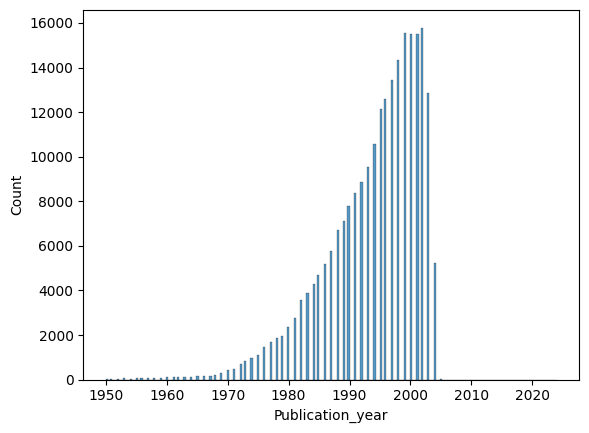

In [42]:
sns.histplot(books_df['Publication_year'])

In [43]:
## also the books after 2005 are negligiable ,lets ommit them

books_df=books_df[~(books_df['Publication_year']>2005)]

<Axes: xlabel='Publication_year', ylabel='Count'>

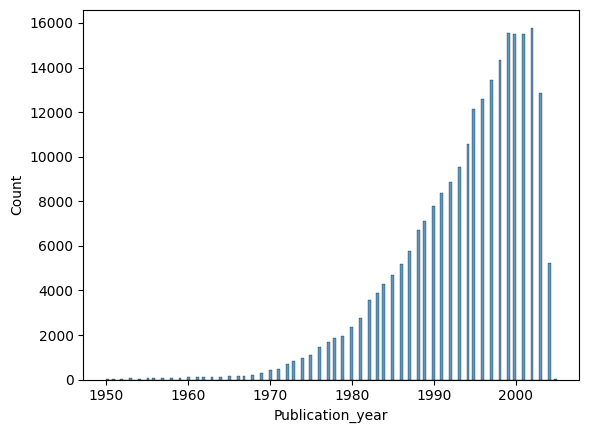

In [44]:
sns.histplot(books_df['Publication_year'])

In [45]:
PROCESSED_BOOKS_OUTPUT='/media/danlof/dan files/data_science_codes/Recommender_project/books_data/cleaned_books.csv'

books_df.to_csv(PROCESSED_BOOKS_OUTPUT,index=False)